In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Preparing Dataset for Logistic Regression

In [4]:
def gender(sex):
    if sex == 'Male':
        return 0
    else:
        return 1

In [5]:
df['Gender'] = df['Gender'].apply(gender)

In [6]:
def age_years(age):
    if age < 18:
        return 0
    elif age < 60:
        return 1
    else:
        return 2

In [7]:
df['Age'] = df['Age'].apply(age_years)

In [8]:
def salary(amount):
    if amount < 10000:
        return 0
    elif amount < 20000:
        return 1
    elif amount < 30000:
        return 3
    elif amount < 40000:
        return 4
    elif amount < 50000:
        return 5
    else:
        return 6

In [9]:
df['EstimatedSalary'] = df['EstimatedSalary'].apply(salary)

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,1,1,0
1,15810944,0,1,3,0
2,15668575,1,1,5,0
3,15603246,1,1,6,0
4,15804002,0,1,6,0
...,...,...,...,...,...
395,15691863,1,1,5,1
396,15706071,0,1,3,1
397,15654296,1,1,3,1
398,15755018,0,1,4,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


### Now lets split the data for training

In [12]:
y = df['Purchased'] # dependent 
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [13]:
x = df.drop(['User ID', 'Purchased'], axis=1) # independent
x

,Gender,Age,EstimatedSalary
0,0,1,1
1,0,1,3
2,1,1,5
3,1,1,6
4,0,1,6
...,...,...,...
395,1,1,5
396,0,1,3
397,1,1,3
398,0,1,4


In [14]:
x_train, x_test , y_train , y_test = test = train_test_split(x,y, test_size= 0.2, random_state=1)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


## Logistic Regression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
model.score(x_train, y_train)

0.665625

In [19]:
model.score(x_test, y_test)

0.6375

In [20]:
y_predict = model.predict(x_test)

In [21]:
confusion_matrix(y_test, y_predict)

array([[48,  0],
       [29,  3]], dtype=int64)

C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


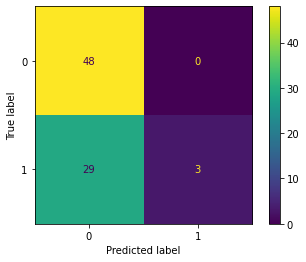

In [22]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

### Preparing Dataset for Other Predictions

In [23]:
df2 = pd.read_csv('Social_Network_Ads.csv')
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
df2['Gender'] = df2['Gender'].apply(gender)

In [25]:
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [27]:
df2.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Now lets split the data for training

In [28]:
y = df2['Purchased'] # dependent 
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [29]:
x = df2.drop(['User ID', 'Purchased'], axis=1) # independent
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


## Decision Tree Classifier

In [32]:
model2 = DecisionTreeClassifier()

In [33]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
model2.score(x_train , y_train)

0.996875

In [35]:
model2.score(x_test, y_test)

0.7875

In [36]:
y_predict = model2.predict(x_test)

In [37]:
confusion_matrix(y_test, y_predict)

array([[40,  8],
       [ 9, 23]], dtype=int64)

C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


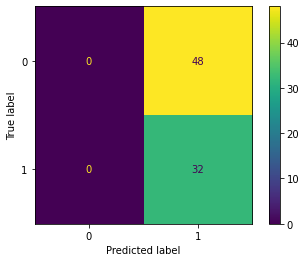

In [38]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

## Random Forest Classifier

In [39]:
model3 = RandomForestClassifier()

In [40]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_predict = model3.predict(x_test)

In [42]:
model3.score(x_test, y_test)

0.85

In [43]:
accuracy_score(y_test, y_predict)

0.85

In [44]:
confusion_matrix(y_test, y_predict)

array([[39,  9],
       [ 3, 29]], dtype=int64)

C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


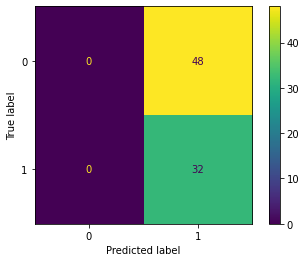

In [45]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

## KNeighbours Classifier

In [46]:
model4 = KNeighborsClassifier(n_neighbors= 5)

In [47]:
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
model4.score(x_train, y_train)

0.8875

In [49]:
model4.score(x_test, y_test)

0.75

In [50]:
y_predict = model4.predict(x_test)

In [51]:
confusion_matrix(y_test, y_predict)

array([[39,  9],
       [11, 21]], dtype=int64)

C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


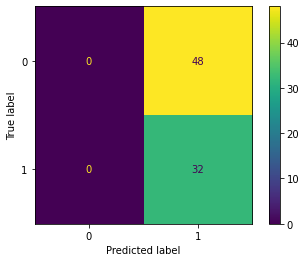

In [52]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

## SVM

In [53]:
model5 = SVC()

In [54]:
model5.fit(x_train,y_train)

SVC()

In [55]:
model5.score(x_train,y_train)

0.7875

In [56]:
model5.score(x_test,y_test)

0.7

In [57]:
y_predict = model5.predict(x_test)

In [58]:
y_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_test, y_predict)

0.7

In [60]:
confusion_matrix(y_test, y_predict)

array([[42,  6],
       [18, 14]], dtype=int64)

C:\Users\w-ZONE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


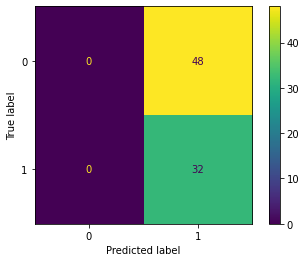

In [61]:
plot_confusion_matrix(model, x_test, y_test)
plt.show()

## Observation

### Prediction Accuracy

 - Logistic Regression - 60 to 70 %  (random state 63 %)

 - DecisionTree Classifier - 75 to 85 %  (random state 78 %)

 - RandomForest Classifier - 85 to 95 %  (random state 85 %)
 
 - KNeighbours Classifier - 70 to 80 %  (random state 75 %)

 - SVC - 70 to 80 %  (random state 70 %)

From this observation Random forest has the highest accuracy and Logistic Regression has the least accuracy.